In [360]:
import pandas as pd
import ROOT as r

In [363]:
def propagate_error_divmult(f, x, y, unx, uny):
    return r.TMath.Sqrt(((unx/x)**2 + (uny/y)**2) * f**2)

def propagate_error_power(f, b, x, unx):
    return r.TMath.Sqrt((f**2 * b**2 * (unx)**2/x**2))

def propagate_error_addsub(unx, uny, a=1, b=1):
    return r.TMath.Sqrt((a*unx)**2 + (b*uny)**2)

def weighted_mean(df, col, col_err):
    return sum(df[col]/df[col_err]**2)/sum(1/df[col_err]**2)

In [364]:
 def time_string_to_seconds(text):
    minute = text.split(":")[0]
    second_milisecond = text.split(":")[1].split(".")

    second = second_milisecond[0]
    milisecond = second_milisecond[1]

    return int(minute)*60*100 + int(second)*100 + int(milisecond)

In [361]:
data = pd.read_csv("../data/data_clean.csv", names=["idx","time","split","kV","pump"])

In [362]:
data

,idx,time,split,kV,pump
0,1,00:02.01,00:02.01,2.5,2
1,2,00:09.25,00:07.24,2.5,2
2,3,00:11.92,00:02.67,2.5,2
3,4,00:20.35,00:08.43,2.5,2
4,5,00:23.52,00:03.17,2.5,2
...,...,...,...,...,...
389,20,01:55.02,00:05.09,4.0,5
390,21,02:17.42,00:22.40,4.0,5
391,22,02:26.68,00:09.26,4.0,5
392,23,03:00.29,00:33.61,4.0,5


In [365]:
data["split"] = data["split"].apply(time_string_to_seconds)/100
data["time"] = data["time"].apply(time_string_to_seconds)/100

In [366]:
data

,idx,time,split,kV,pump
0,1,2.01,2.01,2.5,2
1,2,9.25,7.24,2.5,2
2,3,11.92,2.67,2.5,2
3,4,20.35,8.43,2.5,2
4,5,23.52,3.17,2.5,2
...,...,...,...,...,...
389,20,115.02,5.09,4.0,5
390,21,137.42,22.40,4.0,5
391,22,146.68,9.26,4.0,5
392,23,180.29,33.61,4.0,5


In [367]:
data["kV"] = data["kV"].astype("float")
data["pump"] = data["pump"].astype("float")

In [368]:
data["1/split"] = 1/data["split"]

In [369]:
data["terr"] = [.3 for i in range(len(data))]
data["split_err"] = [.3 for i in range(len(data))]

In [370]:
data["1/split_err"] = [propagate_error_power(data["1/split"][i], -1, data["split"][i], data["split_err"][i]) for i in range(len(data))]

In [371]:
kv_list = data["kV"].unique()
pump_list = data["pump"].unique()

/var/folders/mb/djnxt02s4vqbng178bwhk1280000gn/T/ipykernel_90149/1151046482.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["mean_time"] = tmp["time"].rolling(2).mean()
/var/folders/mb/djnxt02s4vqbng178bwhk1280000gn/T/ipykernel_90149/1151046482.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["mean_time"] = tmp["time"].rolling(2).mean()
/var/folders/mb/djnxt02s4vqbng178bwhk1280000gn/T/ipykernel_90149/1151046482.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

 FCN=3357.1 FROM MIGRAD    STATUS=CONVERGED      73 CALLS          74 TOTAL
                     EDM=7.45075e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.39474e-01   1.15551e-03   1.13519e-05  -7.25593e-02
   2  p1           1.03833e-02   3.15335e-05   3.09792e-07   1.68949e+00
 FCN=837.392 FROM MIGRAD    STATUS=CONVERGED     142 CALLS         143 TOTAL
                     EDM=1.43162e-11    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.74545e-01   2.04512e-03   8.84573e-06   1.36554e-03
   2  p1           1.13010e-02   6.01626e-05   2.60223e-07   4.36063e-02
 FCN=3092.91 FROM MIGRAD    STATUS=CONVERGED     123 CALLS         124 TOTAL
                     EDM=7.452

Info in <TCanvas::Print>: png file ../plots/2.5_2.0.png has been created
Info in <TCanvas::Print>: png file ../plots/2.5_3.0.png has been created
Info in <TCanvas::Print>: png file ../plots/2.5_4.0.png has been created
Info in <TCanvas::Print>: png file ../plots/2.5_5.0.png has been created
Info in <TCanvas::Print>: png file ../plots/3.0_2.0.png has been created
Info in <TCanvas::Print>: png file ../plots/3.0_3.0.png has been created
Info in <TCanvas::Print>: png file ../plots/3.0_4.0.png has been created
Info in <TCanvas::Print>: png file ../plots/3.0_5.0.png has been created
Info in <TCanvas::Print>: png file ../plots/3.5_2.0.png has been created
Info in <TCanvas::Print>: png file ../plots/3.5_3.0.png has been created
Info in <TCanvas::Print>: png file ../plots/3.5_4.0.png has been created
Info in <TCanvas::Print>: png file ../plots/3.5_5.0.png has been created
Info in <TCanvas::Print>: png file ../plots/4.0_2.0.png has been created
Info in <TCanvas::Print>: png file ../plots/4.0_3.0

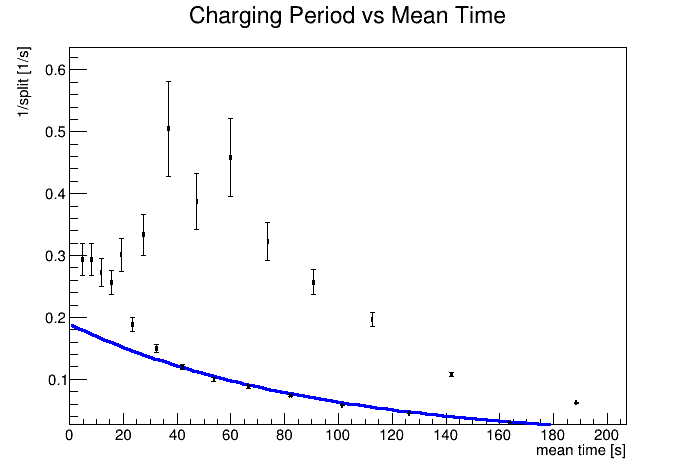

In [372]:
#plot mean_time vs 1/split in root

p_1_dict= {}
chi_sqr = []
for kv in kv_list:
    for pump in pump_list:
        tmp = data[(data["kV"]==kv) & (data["pump"]==pump)]
        tmp["mean_time"] = tmp["time"].rolling(2).mean()
        tmp = tmp.dropna()

        c = r.TCanvas()
        gr = r.TGraphErrors(len(tmp), tmp["mean_time"].values, tmp["1/split"].values, tmp["terr"].values, tmp["1/split_err"].values)
        gr.SetTitle("Charging Period vs Mean Time")
        gr.GetXaxis().SetTitle("mean time [s]")
        gr.GetYaxis().SetTitle("1/split [1/s]")

        f_1 = r.TF1("expfit", "[0]*exp(-[1]*x)",0,2000)
        f_1.SetParameters(0.01,0.01)
        f_1.SetLineWidth(3)
        f_1.SetLineColor(r.kBlue)
        gr.Fit(f_1,"+")

        p_1 = f_1.GetParameter(1)
        p_1_err = f_1.GetParError(1)
        if p_1>0:
            p_1_dict.update({(kv, pump): (p_1, p_1_err)})
            chi_sqr.append(f_1.GetChisquare()/f_1.GetNDF())

        gr.Draw("AP")
        c.Draw()

        #save plot in png
        c.SaveAs("../plots/{}_{}.png".format(kv, pump))

In [374]:
p_1_df = pd.DataFrame.from_dict(p_1_dict, orient="index", columns=["p_1", "p_1_err"])

In [428]:
mean_lambda = weighted_mean(p_1_df, "p_1", "p_1_err")
mean_lambda_err = p_1_df["p_1_err"].mean()

In [429]:
mean_lambda

0.01067333002952617

In [430]:
mean_lambda_err

8.149873047413655e-05

In [431]:
t1_2 = r.TMath.Log(2)/mean_lambda

In [432]:
t1_2

64.9419795548772

In [433]:
t1_2_err = propagate_error_divmult(t1_2, r.TMath.Log(2), mean_lambda, 0, mean_lambda_err)

In [434]:
t1_2_err

0.49587981197605535

In [435]:
# half life of radon 220 gas
t1_2_radon_220 = 55.6

In [436]:
error = (t1_2 - t1_2_radon_220)/t1_2_radon_220

In [437]:
error

0.16802121501577683

In [438]:
std_away = (t1_2 - t1_2_radon_220)/ t1_2_err

In [439]:
std_away

18.839201212184637

In [389]:
p_1_df["chi_sqr"] = chi_sqr

In [390]:
chi_sqr

[209.81871416028696,
 64.41474425490509,
 147.28147990640372,
 319.15793145430104,
 148.35940913034054,
 177.43039575485847,
 94.93874001022134,
 76.70347816722136,
 113.69802757053404,
 130.68983557833417,
 28.3175256064429,
 39.84767689201103,
 353.22649258930556,
 148.85493466271078,
 162.55939982020615,
 100.24016608625053]

## half life vs pump analysis

In [391]:
hf_pump = p_1_df[:4]

In [392]:
hf_pump

,p_1,p_1_err,chi_sqr
"(2.5, 2.0)",0.010383,0.000032,209.818714
"(2.5, 3.0)",0.011301,0.000060,64.414744
"(2.5, 4.0)",0.012555,0.000113,147.281480
"(2.5, 5.0)",0.010842,0.000075,319.157931


In [393]:
hf_pump["half_life"] = r.TMath.Log(2)/hf_pump["p_1"]

/var/folders/mb/djnxt02s4vqbng178bwhk1280000gn/T/ipykernel_90149/1279437296.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hf_pump["half_life"] = r.TMath.Log(2)/hf_pump["p_1"]


In [394]:
hf_pump["half_life_err"] = [propagate_error_divmult(hf_pump["half_life"][i], r.TMath.Log(2), hf_pump["p_1"][i], 0, hf_pump["p_1_err"][i]) for i in range(len(hf_pump))]

/var/folders/mb/djnxt02s4vqbng178bwhk1280000gn/T/ipykernel_90149/491615329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hf_pump["half_life_err"] = [propagate_error_divmult(hf_pump["half_life"][i], r.TMath.Log(2), hf_pump["p_1"][i], 0, hf_pump["p_1_err"][i]) for i in range(len(hf_pump))]


In [395]:
hf_pump["pump"] = [hf_pump.index.get_level_values(0)[i][1] for i in range(len(hf_pump))]

/var/folders/mb/djnxt02s4vqbng178bwhk1280000gn/T/ipykernel_90149/3882090729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hf_pump["pump"] = [hf_pump.index.get_level_values(0)[i][1] for i in range(len(hf_pump))]


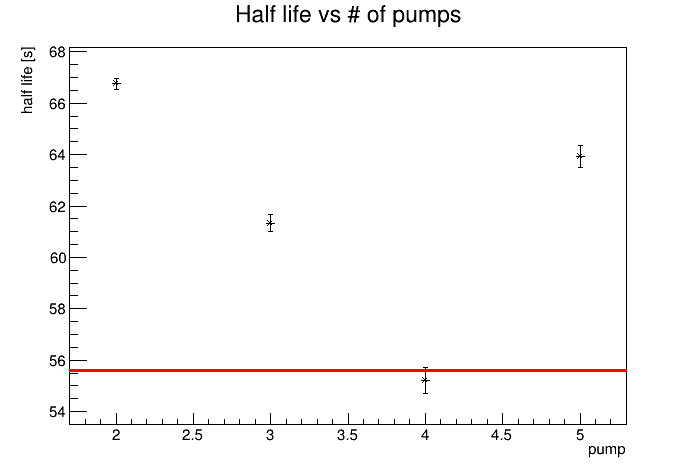

In [396]:
#plot half life vs pump
c = r.TCanvas()
gr = r.TGraphErrors(len(hf_pump), hf_pump["pump"].values, hf_pump["half_life"].values, 0, hf_pump["half_life_err"].values)
gr.SetTitle("Half life vs # of pumps")
gr.GetXaxis().SetTitle("pump")
gr.GetYaxis().SetTitle("half life [s]")

#draw a horizontal line at 55.6
line = r.TLine(1.7, t1_2_radon_220, 5.3, t1_2_radon_220)
line.SetLineColor(r.kRed)
line.SetLineWidth(3)
gr.Draw("AP*")
c.Draw("same")
line.Draw("same")

In [397]:
# save plot in png
c.SaveAs("../plots/half_life_vs_pump.png")

Info in <TCanvas::Print>: png file ../plots/half_life_vs_pump.png has been created


In [398]:
#half life vs kV analysis

In [399]:
p_1_df["kV"] = [p_1_df.index.get_level_values(0)[i][0] for i in range(len(p_1_df))]
p_1_df["pump"] = [p_1_df.index.get_level_values(0)[i][1] for i in range(len(p_1_df))]

In [400]:
hf_kv = p_1_df[p_1_df.pump==4]

In [401]:
hf_kv

,p_1,p_1_err,chi_sqr,kV,pump
"(2.5, 4.0)",0.012555,0.000113,147.281480,2.5,4.0
"(3.0, 4.0)",0.008520,0.000081,94.938740,3.0,4.0
"(3.5, 4.0)",0.008706,0.000062,28.317526,3.5,4.0
"(4.0, 4.0)",0.009899,0.000089,162.559400,4.0,4.0


In [402]:
hf_kv["half_life"] = r.TMath.Log(2)/hf_kv["p_1"]

/var/folders/mb/djnxt02s4vqbng178bwhk1280000gn/T/ipykernel_90149/3417811397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hf_kv["half_life"] = r.TMath.Log(2)/hf_kv["p_1"]


In [403]:
hf_kv["half_life_err"] = [propagate_error_divmult(hf_kv["half_life"][i], r.TMath.Log(2), hf_kv["p_1"][i], 0, hf_kv["p_1_err"][i]) for i in range(len(hf_kv))]

/var/folders/mb/djnxt02s4vqbng178bwhk1280000gn/T/ipykernel_90149/4097177517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hf_kv["half_life_err"] = [propagate_error_divmult(hf_kv["half_life"][i], r.TMath.Log(2), hf_kv["p_1"][i], 0, hf_kv["p_1_err"][i]) for i in range(len(hf_kv))]


In [404]:
#plot half life vs kV

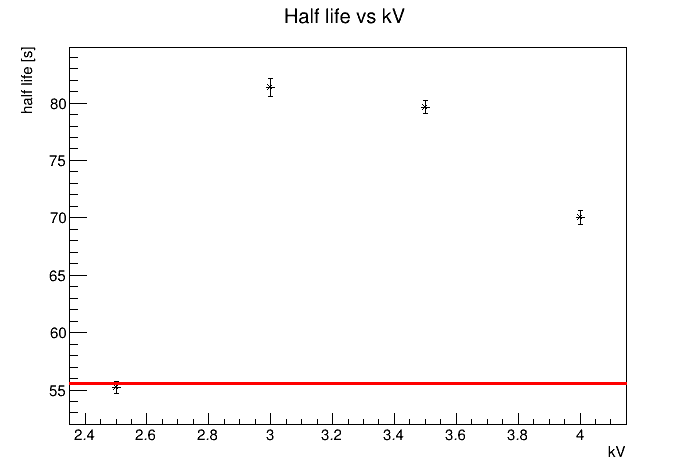

In [405]:
c = r.TCanvas()
gr = r.TGraphErrors(len(hf_kv), hf_kv["kV"].values, hf_kv["half_life"].values, 0, hf_kv["half_life_err"].values)
gr.SetTitle("Half life vs kV")
gr.GetXaxis().SetTitle("kV")
gr.GetYaxis().SetTitle("half life [s]")
#draw a horizontal line at 55.6
line = r.TLine(2.35, t1_2_radon_220, 4.15, t1_2_radon_220)
line.SetLineColor(r.kRed)
line.SetLineWidth(3)
gr.Draw("AP*")
c.Draw("same")
line.Draw("same")

In [406]:
#save plot in png
c.SaveAs("../plots/half_life_vs_kv.png")

Info in <TCanvas::Print>: png file ../plots/half_life_vs_kv.png has been created
